<a href="https://colab.research.google.com/github/idoyudha/paper_rock_scissor/blob/master/Final_Project_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all required packages
#tensorflow and keras to construct the model
#os to read files and directory structure

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import os

In [ ]:
#define url and download the dataset
URL = 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'
path_to_zip = tf.keras.utils.get_file('/tmp/rockpaperscissors.zip', origin=URL, extract=True)

322879488/322873683 [==============================] - 78s 0us/step


In [ ]:
#listdown directory tmp
os.listdir('/tmp/')

['rockpaperscissors.zip']

In [ ]:
#extract all files in zipfile
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#listdown in tmp directory, to ensure we finish extract all file
os.listdir('/tmp')

['__MACOSX', 'rockpaperscissors.zip', 'rockpaperscissors']

In [ ]:
#list in directory base
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [ ]:
#how many data that we have in file
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
rock = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock'))
paper = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper'))
scissors = len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors'))

print('Data rock = ', rock)
print('Data paper = ', paper)
print('Data scissors = ', scissors)

Data rock =  726
Data paper =  712
Data scissors =  750


In [ ]:
#data preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='reflect',
    validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32, #default
    class_mode='categorical', #supports multi-label output
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#create the model of 4 convolution blocks with max pool layer in each of them
#fully connected layer with 512 units on top of it that is acivated by relu activation funtion
#Conv layer: extract features from image
#Pooling layer: redure spatial volume of input image after convolution
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')])

In [ ]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
model.compile(optimizer='Adamax',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    callbacks=callbacks,
    verbose = 2)

Epoch 1/20
25/25 - 49s - loss: 1.0959 - accuracy: 0.3818 - val_loss: 1.1042 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 2/20
25/25 - 51s - loss: 0.9497 - accuracy: 0.6438 - val_loss: 0.8420 - val_accuracy: 0.7063 - lr: 0.0010
Epoch 3/20
25/25 - 51s - loss: 0.7743 - accuracy: 0.7887 - val_loss: 0.7879 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 4/20
25/25 - 49s - loss: 0.7156 - accuracy: 0.8429 - val_loss: 0.6761 - val_accuracy: 0.8687 - lr: 0.0010
Epoch 5/20
25/25 - 49s - loss: 0.6656 - accuracy: 0.8922 - val_loss: 0.6800 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/20
25/25 - 51s - loss: 0.6507 - accuracy: 0.9075 - val_loss: 0.6374 - val_accuracy: 0.9187 - lr: 0.0010
Epoch 7/20
25/25 - 55s - loss: 0.6323 - accuracy: 0.9182 - val_loss: 0.6335 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 8/20
25/25 - 50s - loss: 0.6319 - accuracy: 0.9234 - val_loss: 0.6177 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 9/20
25/25 - 50s - loss: 0.6222 - accuracy: 0.9286 - val_loss: 0.6316 - val_accuracy: 0.9125 - lr:

Using TensorFlow backend.


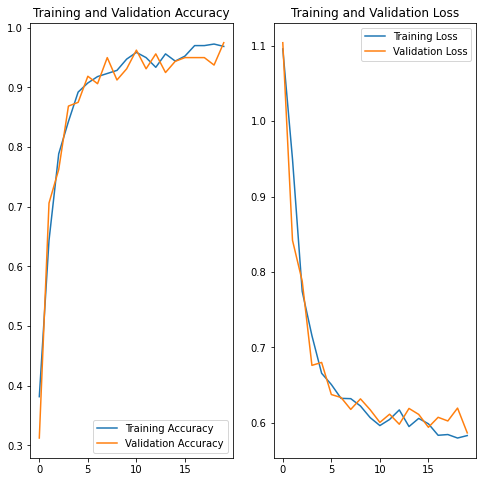

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
rock


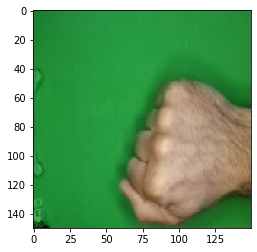

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')